In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PyQt5

eplus_out_file = "~/Documents/HVAC-RL-Control/src/a3c-res-v0.1/case20-2/train_out.csv"
tgt_stpt_name = 'SPACE1-1:Zone Thermostat Heating Setpoint';
cutoff_time = 21;
turnon_time = 6;

In [28]:
def getFullColname(colnames, tgtname):
    for colname in colnames:
        if tgtname in colname:
            return colname;

In [29]:
df = pd.read_csv(eplus_out_file)
df_colnames = list(df.columns.values)
tgt_stpt_name = getFullColname(df_colnames, tgt_stpt_name)

In [30]:
df['Hour'] = pd.to_numeric(df['Date/Time'].str.split().str.get(1).str.slice(0, 2))


In [31]:
tgt_stpt_series = df[tgt_stpt_name].loc[(df['Hour'] >= cutoff_time) | (df['Hour'] <= turnon_time)]

In [32]:
tgt_stpt_series.value_counts()

15.0    7675
16.0    1580
17.0     534
18.0     276
19.0     185
20.0     142
21.0     115
22.0     112
23.0      95
24.0      51
25.0      29
26.0       6
Name: SPACE1-1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep), dtype: int64

In [33]:
stpt_frequency_array = tgt_stpt_series.value_counts().as_matrix().reshape(1, -1)
stpt_frequency_array = np.append(tgt_stpt_series.value_counts().index.values.reshape(1, -1),
                                 stpt_frequency_array, 0).tolist()

for stpt in range(15, 31):
    if stpt not in stpt_frequency_array[0]:
        stpt_frequency_array[0].append(stpt);
        stpt_frequency_array[1].append(0);
stpt_frequency_array = np.array(stpt_frequency_array);
stpt_frequency_array

array([[  1.50000000e+01,   1.60000000e+01,   1.70000000e+01,
          1.80000000e+01,   1.90000000e+01,   2.00000000e+01,
          2.10000000e+01,   2.20000000e+01,   2.30000000e+01,
          2.40000000e+01,   2.50000000e+01,   2.60000000e+01,
          2.70000000e+01,   2.80000000e+01,   2.90000000e+01,
          3.00000000e+01],
       [  7.67500000e+03,   1.58000000e+03,   5.34000000e+02,
          2.76000000e+02,   1.85000000e+02,   1.42000000e+02,
          1.15000000e+02,   1.12000000e+02,   9.50000000e+01,
          5.10000000e+01,   2.90000000e+01,   6.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [34]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
freq_plot = plt.bar(stpt_frequency_array[0, :], stpt_frequency_array[1, :])

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


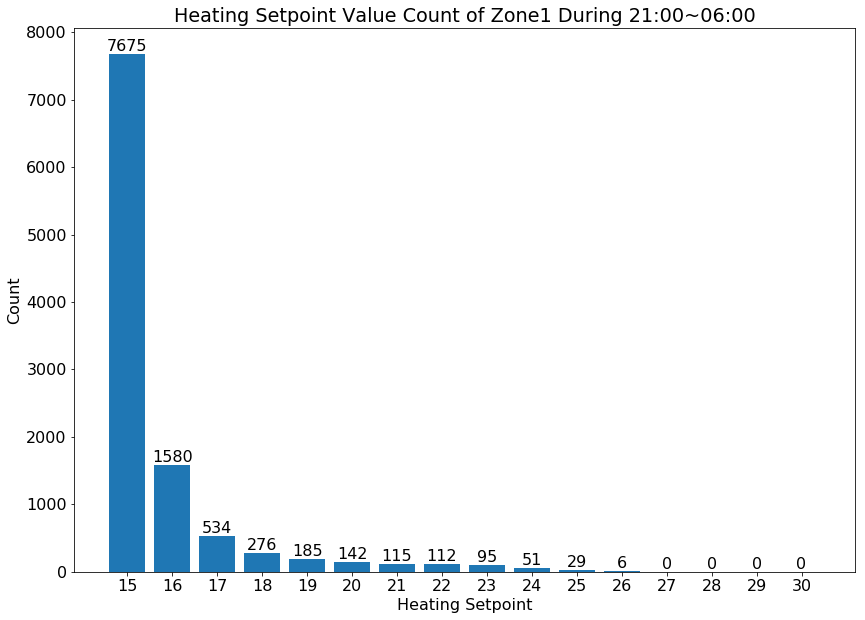

In [36]:
autolabel(freq_plot)
ax.set_ylabel('Count')
plt.xticks(np.arange(15, 31, 1.0))
ax.set_xlabel('Heating Setpoint')
ax.set_title('Heating Setpoint Value Count of Zone1 During 21:00~06:00')
plt.show()